In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#!pip install yfinance --upgrade --no-cache-dir

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

In [8]:
stock = "CELH"
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


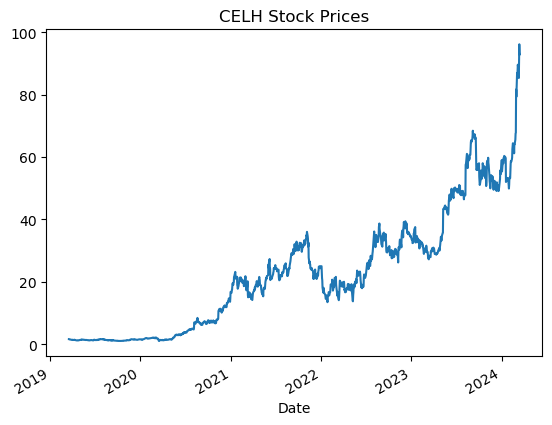

In [9]:
data['Close'].plot()
plt.title("CELH Stock Prices")
plt.show()

In [ ]:
#The Problem can be seen in two ways :Classifictaion and Regression 
#Part 1 - Classifictaion :Whether someone should buy or sell the stock 
#######PART 1############

In [10]:
#Input features

data['Open-Close'] = data['Open'] - data['Close']
data['High-Low'] = data['High'] - data['Low']
data=data.dropna()


In [11]:
X = data[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2019-03-18,-0.176666,0.223334
2019-03-19,0.006666,0.066667
2019-03-20,0.053333,0.120000
2019-03-21,0.023334,0.076667
2019-03-22,0.040000,0.093334


In [ ]:
#Classification :Y is target variable
#buy denoted by (+1), sell denoted by (-1)

In [12]:
y = np.where(data['Close'].shift(-1) > data['Close'],1,-1)

In [13]:
y

array([-1, -1, -1, ..., -1, -1, -1])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 

In [16]:
#using GridSearch to find the best parameter 
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)

In [17]:
#fit the model
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [18]:
accuracy_train = accuracy_score(y_train,model.predict(X_train))
accuracy_test = accuracy_score(y_test,model.predict(X_test))

In [19]:
print('Train data Accuracy :%.2f' %accuracy_train)
print('Test data Accuracy: %.2f' %accuracy_test)

Train data Accuracy :0.61
Test data Accuracy: 0.49


In [20]:
y =  data['Close']

In [21]:
y

Date
2019-03-18     1.663333
2019-03-19     1.656667
2019-03-20     1.610000
2019-03-21     1.593333
2019-03-22     1.533333
                ...    
2024-03-11    85.309998
2024-03-12    91.070000
2024-03-13    96.110001
2024-03-14    93.459999
2024-03-15    92.900002
Name: Close, Length: 1259, dtype: float64

In [ ]:
#KNN Regression

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25)

#GridSearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg,params,cv=10)

#fit the model and make predictions
model_reg.fit(X_train_reg,y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [23]:
print(predictions)

[ 6.37027786 26.13722229 25.76138941 23.85972246 51.6163888  31.03222179
 33.69055593 32.99888865 30.05083323 38.51777748  8.17416658 44.22138882
 32.58194399 36.00111103 34.76499995  7.58111107 38.45416705 32.71277761
 26.62333345 21.3236111  33.86305539 38.88694429 19.87916644 32.03083324
 25.5919443  28.38666677 30.65972237  1.30222234  7.29444446 31.7727776
  1.34694459 23.58611127  3.10361099 32.27833295 17.22138894 35.08777761
 16.85999997 34.74388917 39.66916625 43.63388809  4.00083333 33.8241663
 31.13027747  1.663611    1.44638898 20.57833326 46.41999976 36.02833366
 34.24138856 38.68527746  7.73499997 40.96222162 21.2163885  22.67750021
 37.888333    1.65083323 33.58722178 32.55555598 19.73611101  1.54805558
 22.96999971 23.77388875  1.38388893 14.31694444 36.1408329  21.59055571
  1.39972233 36.32249959 30.05361088  1.4630555  34.11166652 49.27027766
 29.64694436  4.78805546 35.91222254 27.96750021 50.29111036  1.63888884
 10.46861104 39.86444457 30.29416688  1.42972223 24.3

In [24]:
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

27.771388057168526

In [25]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [26]:
valid.head(10)

,Actual Close,Predicted Close value
Date,,
2020-06-23,3.700000,6.370278
2022-05-02,18.193333,26.137222
2022-04-12,16.976667,25.761389
2022-09-23,29.506666,23.859722
2023-11-07,58.053333,51.616389
2023-08-24,59.206669,31.032222
2022-09-27,29.943333,33.690556
2021-10-12,32.406666,32.998889
2022-11-08,27.453333,30.050833
